# Data Analytics Final Project: 
*"Comparing Researchers teaching performance with faculty members dedicated completely to teaching"*

- Luis Ángel Sedas Díaz
- Mario Chávez

Tecnológico de Monterrey, Monterrey, NL, México

<p style="background-color:rgb(230,230,230);"> <b>Abstract:</b> University rankings have become a relevant factor that measures quality and performance. In those rankings, research activity is one of the most important metrics, and so universities need to motivate their faculty members to constantly contribute with new knowledge. It is common for researchers to also do lectures at different academic levels, apart from their research activity. The background and activities of a researcher are different from someone who is fully dedicated to teaching. For many years, there has been a debate between who usually develops better as a teacher, whether researchers or full-time professors. The current research aims to end with that discussion. The stated hypothesis is that researchers teaching performance is better than faculty members dedicated completely to teaching. The results of this analysis could be of significant relevance to academic institutes and could support the development of efficient research and learning strategies.</p>

## Contents
1. [Data Wrangling](DA-cleaning.ipynb) - Notebook for cleaning data
2. [Functions](functions.ipynb) - all created functions
3. [Descriptive Analysis](#descriptive_analysis)
    1. [Pie Charta](#pie_charts)
    2. [Score Distributions](#score_distributions)
4. [Feature Selection](#feature_selection)
5. [Clustering](#clustering.ipynb)
6. [Classification](#classification.ipynb)
7. [Conclusions](#conclusions)


Questions and Tasks:
- What is the relation between research and teaching?
- What characteristics do researchers, who are qualified as good/bad, have in common?
- What characteristics do professors, who are qualified as good/bad, have in common?
- Create a classification variable (good or bad) for each professor, and so we need to generate a criteria of what is a good/bad score. We can start by partition around the median (50%).
- Find which variables affect the most the score in ECOA (feature selection).
- Apply clustering to find similarities between individuals.

<p style="background-color:yellow;"> We want to test if a category makes a significant difference in the scores distribution. With this we can generate a set of features later on in the clustering phase. We also need to research feature selection and the preprocessing package of scikitlearn to understand the best way to prepare the data.</p>

## 1. Data Wrangling
The data is an `.xlsx` file, with 15781 registers and 60 feautures, that describe the course, the professor and the evaluation of students.

In [1]:
%run .\DA-cleaning.ipynb

## 2. Functions

In [2]:
%run .\functions.ipynb

## 3. Descriptive Analysis<a id='descriptive_analysis'></a>
Here I try to understand how the data is distributed along the different features 
### 3.1 Thesis courses
There are `545` classes (3.45% of data) marked as thesis and `15236` classes (96.5% of data) as non-thesis. We can see a significant 

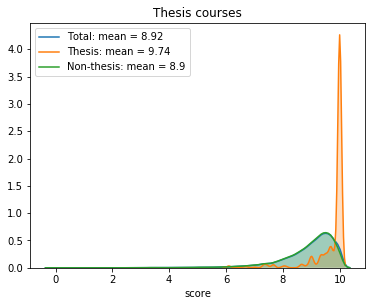

In [69]:
plt.figure(figsize=(6,4.5))
sns.kdeplot(data.score, label = 'Total: mean = ' + str(round(data.score.mean(),2)), shade=True)
sns.kdeplot(data[data.thesis == 1].score, label = 'Thesis: mean = ' + str(round(data[data.thesis==1].score.mean(),2)), shade=True)
sns.kdeplot(data[data.thesis != 1].score, label = 'Non-thesis: mean = ' + str(round(data[data.thesis!=1].score.mean(),2)), shade=True)
plt.title('Thesis courses')
plt.xlabel('score')
plt.savefig('images/thesis.png')

In [77]:
data_thesis = data[data.thesis == 1].reset_index(drop=True)
data_complete = data.copy()
data = data[data.thesis != 1].reset_index(drop=True)
data = data.drop(columns=['thesis'])

In [33]:
# Creates a table, grouping by 'Campus'
table_count_campus = data[['campus','ID']].groupby(['campus'],as_index=False).count().sort_values(by=['ID'],ascending=False).reset_index(drop=True)
table_count_campus['percentage'] = table_count_campus['ID']/len(data)*100

In [34]:
# Creates a new table, groping the last 24 campus as 'Others'
new_table_count_campus = table_count_campus[0:8].copy()

d = {'campus': ['Others'], 'ID': [table_count_campus[7:].ID.sum()], 'percentage': [table_count_campus[8:].ID.sum()/len(data)*100]}
df = pd.DataFrame(data=d)

new_table_count_campus = new_table_count_campus.append(df, ignore_index=True)

### 3.2 Pie Charts <a id ='pie_charts'></a>

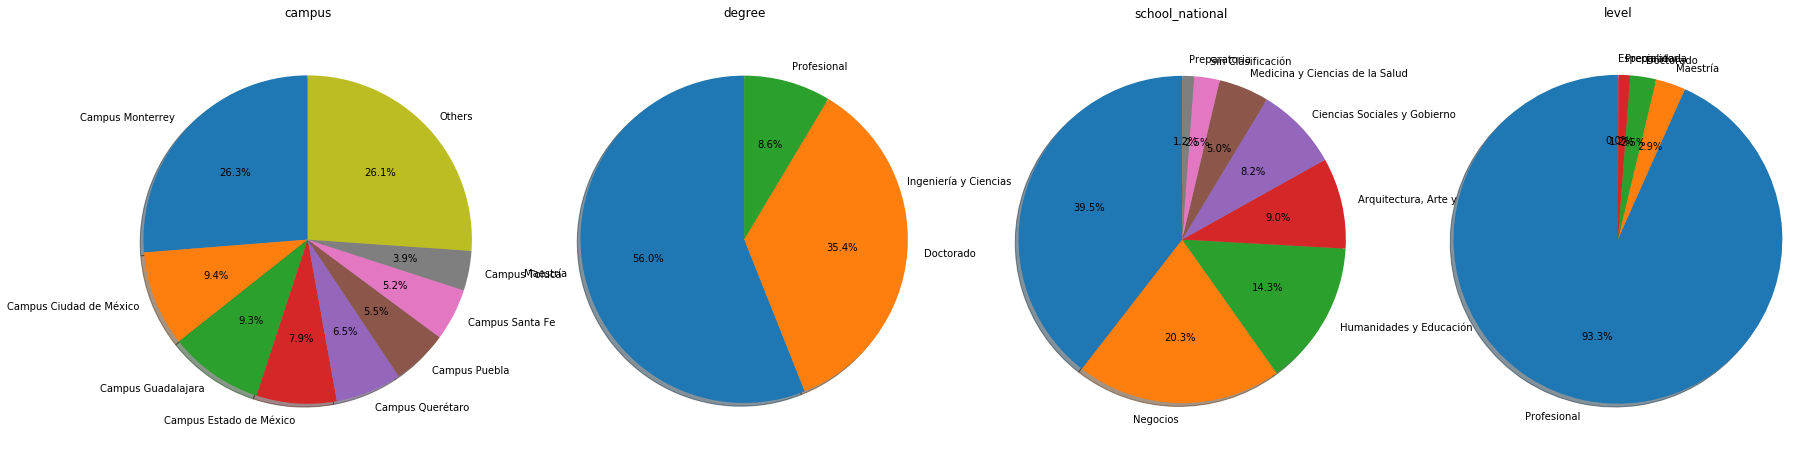

In [35]:
plt.figure(figsize=(30,8))       # set dimensions of the figure
plt.subplot(1,4, 1); pie_plot(new_table_count_campus,'campus','ID')
plt.subplot(1,4, 2); pie_plot(grouping_df(data,'degree','ID'),'degree','ID')
plt.subplot(1,4, 3); pie_plot(grouping_df(data,'school_national','ID'),'school_national','ID')
plt.subplot(1,4, 4); pie_plot(grouping_df(data,'level','ID'),'level','ID')
plt.show()

### 3.3 Score distributions<a id='score_distributions'></a>
Plots the shape of a distribution. Like an histogram, the KDE plots encode the density of observations on one axis with heigth along the other axis.

Drawing a KDE is more computationally involved than drawing a histogram. What happens is that each observation is first replaced with a normal (Gaussian) curve centered at that value.

Next, these curves are summed to compute the value of the density at each point in the support grid. The resulting curve is then normalized so that the area under it is equal to 1.

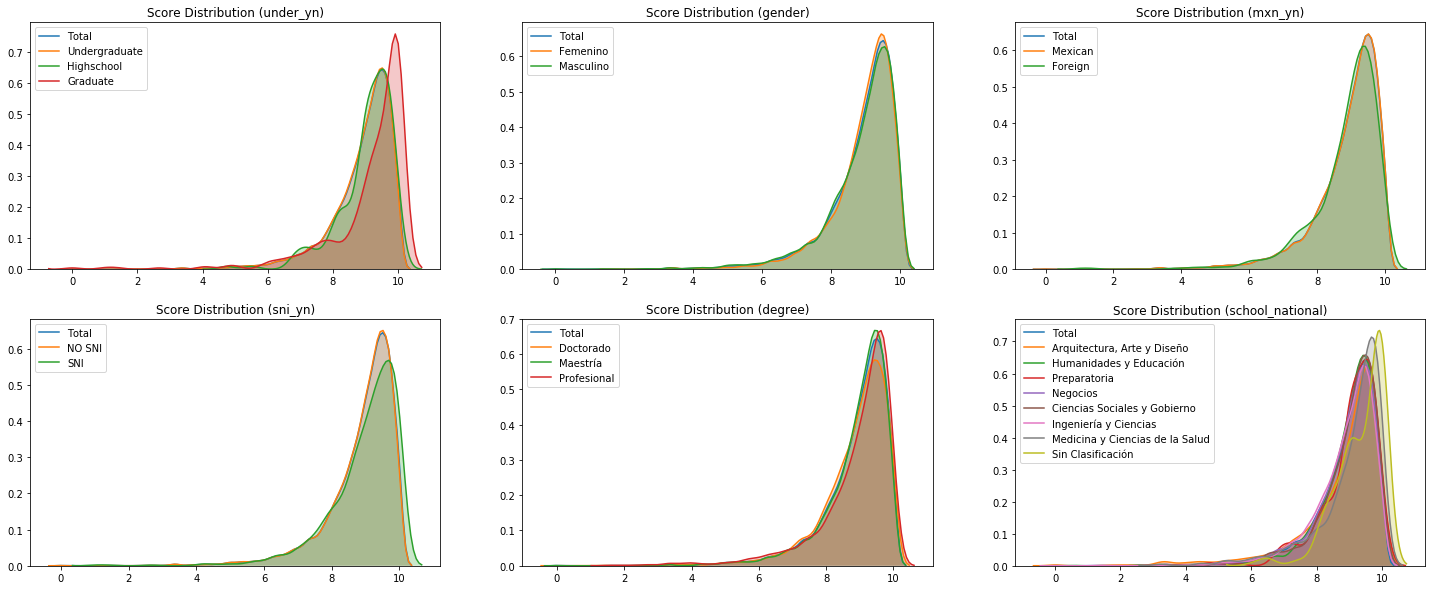

In [44]:
plt.figure(figsize=(25,10))       # set dimensions of the figure
plt.subplot(2,3, 1);     distribution_plot(data,'under_yn')
plt.subplot(2,3, 2);     distribution_plot(data,'gender')
plt.subplot(2,3, 3);     distribution_plot(data,'mxn_yn')
plt.subplot(2,3, 4);     distribution_plot(data,'sni_yn')
plt.subplot(2,3, 5);     distribution_plot(data,'degree')
plt.subplot(2,3, 6);     distribution_plot(data,'school_national')
plt.show()

We can see that Graduate students give better scores to their professors. Because 94% of the data is from undergraduate courses, this distribution is basically the same as the one from the complete data. This also happens in the distribution of "NO SNI" which are the no reseachers, because this represents the 90% of the individuals.

From these plots we can se that the distributions that differ from the rest are the ones of:
- **under_yn**
- **sni_yn**

In [62]:
prueba_pivot = pd.pivot_table(data, values='ID', index=['sni_yn'], columns=['under_yn'], aggfunc=len, margins=True)
(prueba_pivot/len(data)*100).round(decimals=2)

under_yn,Graduate,Highschool,Undergraduate,All
sni_yn,,,,
NO SNI,0.96,1.16,90.88,93.01
SNI,1.61,0.03,5.35,6.99
All,2.57,1.19,96.23,100.00


In [61]:
prueba_pivot = pd.pivot_table(data_complete, values='ID', index=['sni_yn'], columns=['under_yn'], aggfunc=len, margins=True)
(prueba_pivot/len(data_complete)*100).round(decimals=2)

under_yn,Graduate,Highschool,Undergraduate,All
sni_yn,,,,
NO SNI,1.30,1.12,87.87,90.29
SNI,4.22,0.04,5.44,9.71
All,5.52,1.17,93.31,100.00


From this pivot table we can see different things:
1. Not researchers (NO_SNI) give classes maninly on the Undergraduate level (97.7%). 
2. Researchers give (SNI) also give more classses at the undergraduate level (76.4% & 22.9%), but if we considere the thesis subjects then is balanced (56.02% & 43.46)

We are going to analyze how researchers and non-researchers behave in:
- General (Along all courses).
- by course level.
- by subject area.

### 3.4 Experience vs Score  <a id='under_grad'></a>

In [70]:
df_under = data[data.under_yn == 'Undergraduate'][['experience','antiguedad','score']].dropna().reset_index(drop=True)
df_grad = data[data.under_yn == 'Graduate'][['experience','antiguedad','score']].dropna().reset_index(drop=True)

df_sni = data[data.sni_yn=='SNI'][['experience','antiguedad','score']].dropna().reset_index(drop=True)
df_nosni = data[data.sni_yn=='NO SNI'][['experience','antiguedad','score']].dropna().reset_index(drop=True)

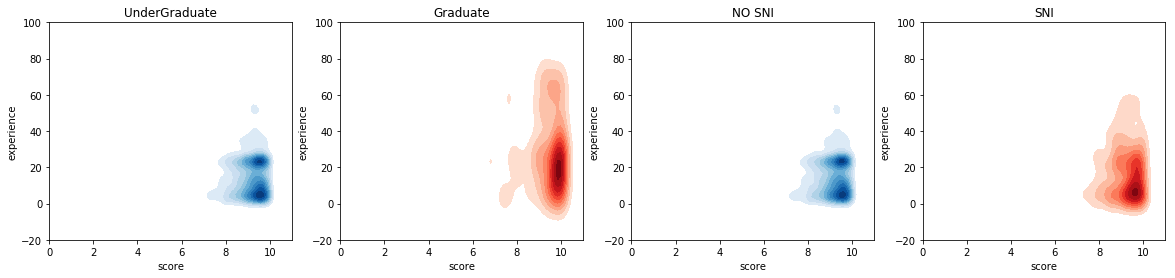

In [4]:
plt.figure(figsize=(20,4))       # set dimensions of the figure

plt.subplot(1,4, 1); 
sns.kdeplot(df_under.score, df_under.experience, cmap="Blues", shade=True, shade_lowest=False)
plt.title('UnderGraduate')
plt.xlim((0,11)); plt.ylim((-20,100))

plt.subplot(1,4, 2); 
sns.kdeplot(df_grad.score, df_grad.experience, cmap="Reds", shade=True, shade_lowest=False)
plt.xlim((0,11)); plt.ylim((-20,100))
plt.title('Graduate')

plt.subplot(1,4, 3); 
sns.kdeplot(df_nosni.score, df_nosni.experience, cmap="Blues", shade=True, shade_lowest=False)
plt.xlim((0,11)); plt.ylim((-20,100))
plt.title('NO SNI')

plt.subplot(1,4, 4); 
sns.kdeplot(df_sni.score, df_sni.experience, cmap="Reds", shade=True, shade_lowest=False)
plt.xlim((0,11)); plt.ylim((-20,100))
plt.title('SNI')

plt.show()

From the Graduate Jointplot we can see that the scores are concentrated and the experience is really spread, so at the graduate level the professors get the same score, but their experience varies a lot. While in the undergraduate case both are relatively spread, bu the experience variable has a bimodal distribution. 


### 3.5 Antiguedad vs Score

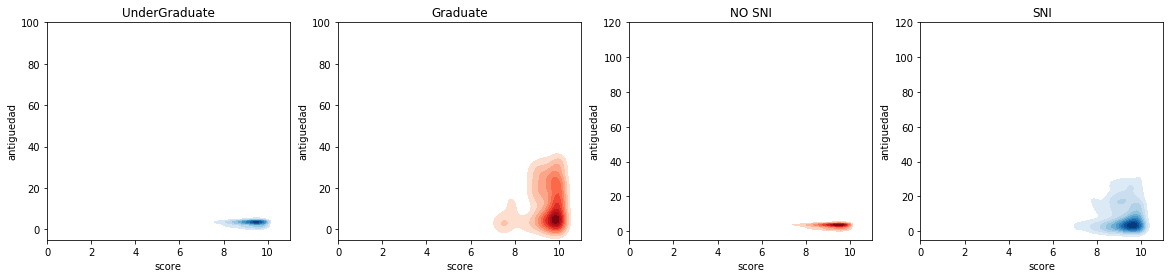

In [105]:
plt.figure(figsize=(20,4))       # set dimensions of the figure

plt.subplot(1,4, 1); 
sns.kdeplot(df_under.score, df_under.antiguedad, cmap="Blues", shade=True, shade_lowest=False)
plt.title('UnderGraduate')
plt.xlim((0,11)); plt.ylim((-5,100))

plt.subplot(1,4, 2); 
sns.kdeplot(df_grad.score, df_grad.antiguedad, cmap="Reds", shade=True, shade_lowest=False)
plt.xlim((0,11)); plt.ylim((-5,100))
plt.title('Graduate')

plt.subplot(1,4, 3); 
sns.kdeplot(df_nosni.score, df_nosni.antiguedad, cmap='Reds',shade=True, shade_lowest=False)
plt.xlim((0,11)); plt.ylim((-5,120))
plt.title('NO SNI')

plt.subplot(1,4, 4); 
sns.kdeplot(df_sni.score, df_sni.antiguedad, cmap='Blues',shade=True, shade_lowest=False)
plt.xlim((0,11)); plt.ylim((-5,120))
plt.title('SNI')

plt.show()

### 3.6 Features with nan
We can see that features like `age`, `school_giee`, `giee`, `giee_role` have a lot of nan values. The feature `SNI` gices the of researcher, but it has a lot of nan because those are full time professors. So we will drop the previous features but `age`, because it may have a relation with `antiguedad` (años de antiguedad) or `experience` (semeters).

In [246]:
for i in data:
    v = sum(data[i].isnull()*1)
    if v != 0:
        print(i,v)

cat_rh 43
age 5102
antiguedad 2095
degree 31
experience 1246
school_giee 14003
giee 14003
giee_role 14003
SNI 14171
seniors 1
participation 1
05num 2
05avg 38
05std 38
06num 4
06avg 43
06std 43
08num 4
08avg 37
08std 37
score 51


In [276]:
c1 = np.logical_not(data.antiguedad.isnull()).values;
c2 = np.logical_not(data.age.isnull()).values;
c3 = np.logical_not(data.experience.isnull()).values;
c4 = (data.sni_yn=='NO SNI').values;
c5 = (data.sni_yn=='SNI').values;

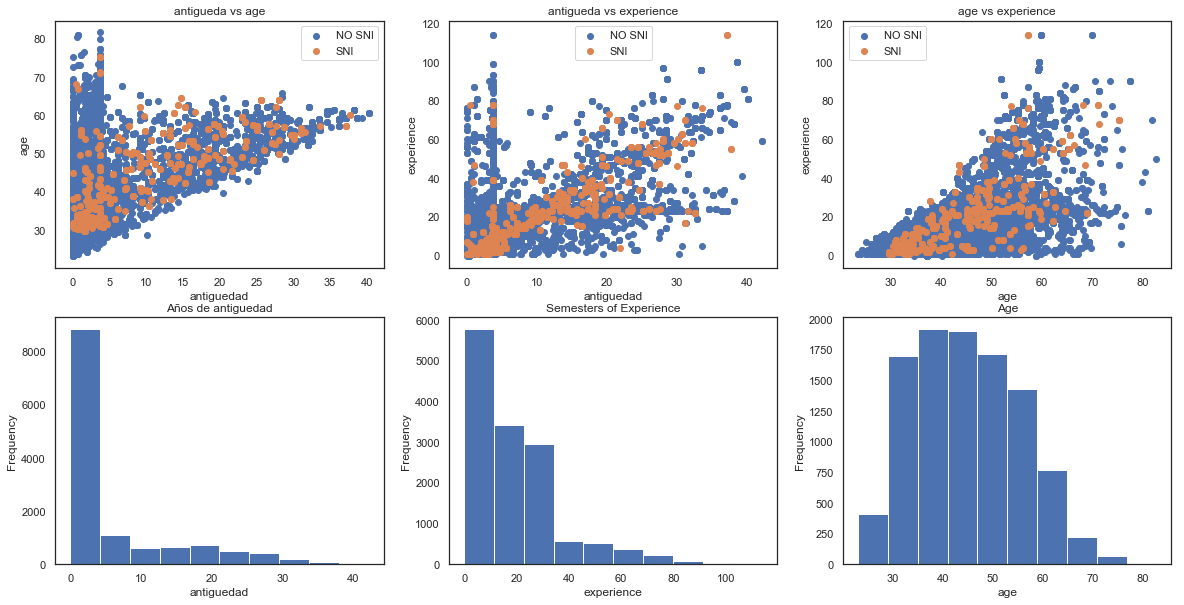

In [298]:
plt.figure(figsize=(20,10))       # set dimensions of the figure

plt.subplot(2,3, 1); 

plt.scatter(data[c1 & c2 & c4].antiguedad,data[c1 & c2 & c4].age,label = 'NO SNI');
plt.scatter(data[c1 & c2 & c5].antiguedad,data[c1 & c2 & c5].age,label = 'SNI'); 
plt.legend();plt.xlabel('antiguedad');plt.ylabel('age');plt.title('antigueda vs age');

plt.subplot(2,3, 2); 
plt.scatter(data[c1 & c3 & c4].antiguedad,data[c1 & c3 & c4].experience,label = 'NO SNI'); 
plt.scatter(data[c1 & c3 & c5].antiguedad,data[c1 & c3 & c5].experience, label = 'SNI'); 
plt.legend();plt.xlabel('antiguedad');plt.ylabel('experience');plt.title('antigueda vs experience');

plt.subplot(2,3, 3); 
plt.scatter(data[c2 & c3 & c4].age,data[c2 & c3 & c4].experience,label = 'NO SNI'); 
plt.scatter(data[c2 & c3 & c5].age,data[c2 & c3 & c5].experience, label = 'SNI'); 
plt.legend();plt.xlabel('age');plt.ylabel('experience');plt.title('age vs experience');

plt.subplot(2,3,4)
plt.hist(data.antiguedad)
plt.title("Años de antiguedad");plt.xlabel("antiguedad");plt.ylabel("Frequency");

plt.subplot(2,3,5)
plt.hist(data.experience)
plt.title("Semesters of Experience");plt.xlabel("experience");plt.ylabel("Frequency");

plt.subplot(2,3,6)
plt.hist(data.age)
plt.title("Age");plt.xlabel("age");plt.ylabel("Frequency");

plt.show()

## 4. Feature Selection<a id='feature_selection'></a>
We select the features that are related to the professors and the ones that are related to the class.

In [ ]:
# Features that are related to the class
class_var = ['Crn','num_grup','level','terminal_group','courses_attributes','multicampus',
            'seniors','opinions','participation','teach_hours','lecture_hours','lab_hours',
            'credits','05_num','05_avg','05_std','06_num','06_svg','06_std','08_num','08_avg',
            '08_std','under_yn']

# Features that are related to the professor
prof_var = ['ID','rectoria','campus','division','department','cat_lab','cat_escolar','cat_rh',
            'nationality','gender','age','antiguedad','degree','pdhd','experience','school_national',
            'school_giee','giee','giee_role','SNI','percentage_responsability','main_professor',
            'books','bseries','proceedings','journal_q1q2','journal_q3q4','total','books_norm',
            'bseries_norm','proceedings_norm','journal_q1q2_norm','journal_q3q4_norm','total_norm',
            'sni_yn','score','counts_total','counts_graduate','counts_undergraduate','counts_highschool','mxn_yn']

In [90]:
# We select the attributes of main interest
data_correlation = data[['terminal_group','multicampus','seniors','participation','teach_hours','lecture_hours','lab_hours',
      'credits','under_yn','gender','age','antiguedad','degree','pdhd','experience','percentage_responsability',
      'main_professor','books','bseries','proceedings','journal_q1q2','journal_q3q4','total','books_norm',
      'bseries_norm','proceedings_norm','journal_q1q2_norm','journal_q3q4_norm','total_norm',
      'sni_yn','score','counts_total','counts_graduate','counts_undergraduate','counts_highschool','mxn_yn']];

In [101]:
data_prep = data[['age', 'antiguedad','experience','percentage_responsability','terminal_group','multicampus',
                  'main_professor','seniors','participation','teach_hours','lecture_hours', 'lab_hours',
                  'credits','total_norm', 'sni_yn', 'score','under_yn', 'mxn_yn']];
df_dum = pd.get_dummies(data_prep);

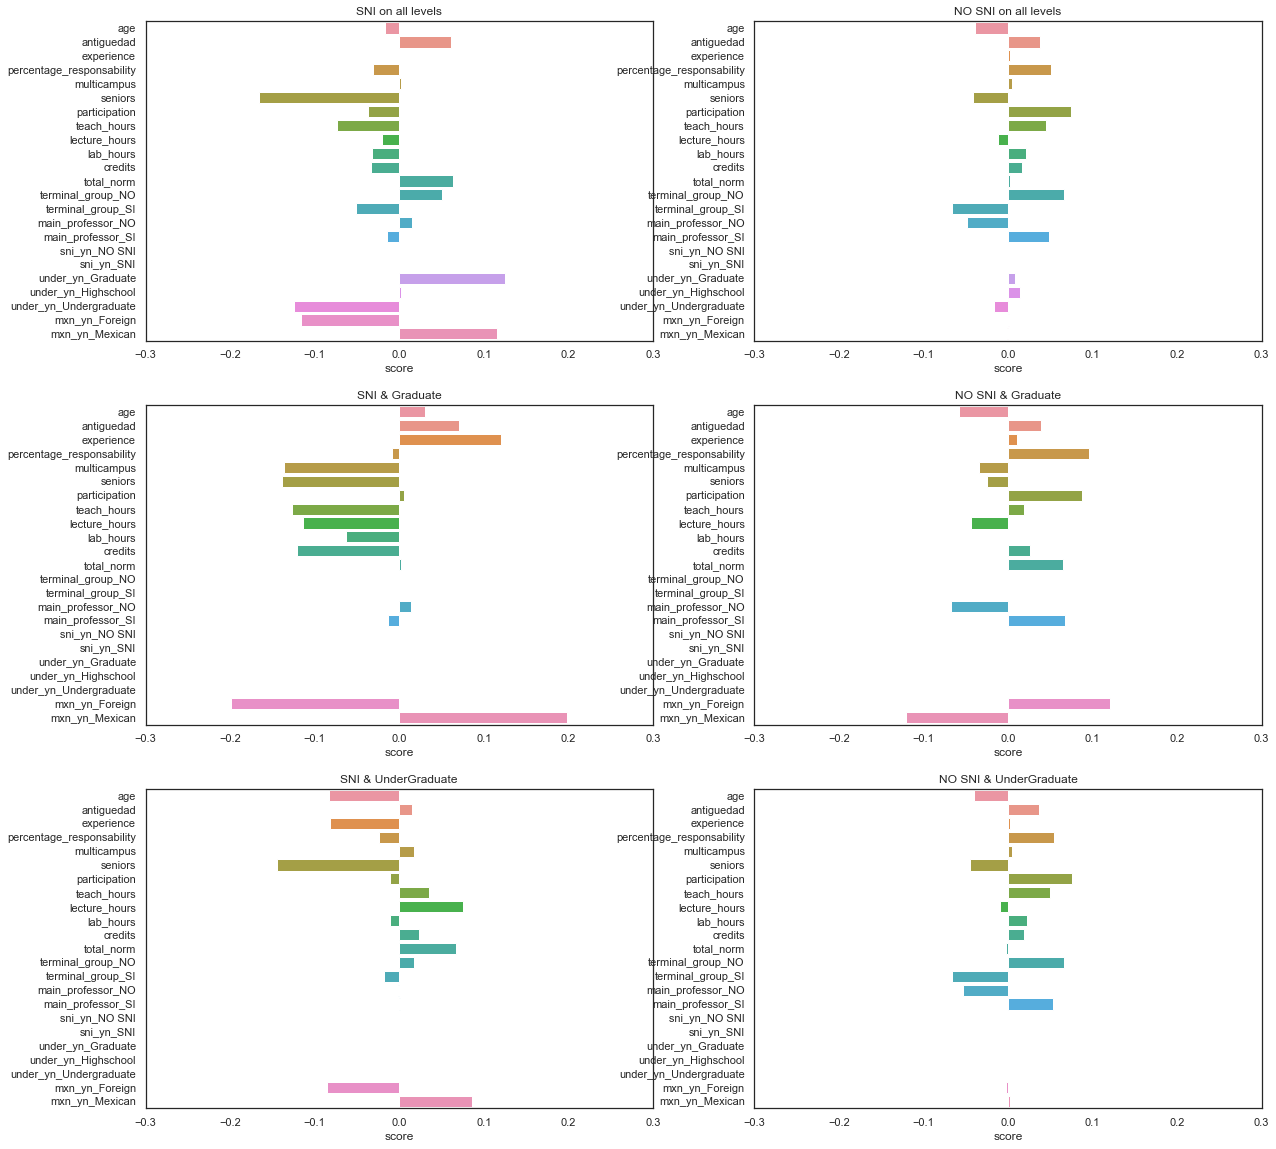

In [244]:
plt.figure(figsize=(20,20))       # set dimensions of the figure

plt.subplot(3,2, 1); 
corr = df_dum[df_dum.sni_yn_SNI==1].corr();
corr = corr.loc[corr.index !='score',:]
y_index = corr.index;
values_cor = corr['score'];
sns.barplot(y = y_index, x = values_cor, orient='h');plt.xlim((-0.3,0.3));plt.title('SNI on all levels')

plt.subplot(3,2, 2); 
corr = df_dum[df_dum.sni_yn_SNI==0].corr();
corr = corr.loc[corr.index !='score',:]
y_index = corr.index;
values_cor = corr['score'];
sns.barplot(y = y_index, x = values_cor, orient='h');plt.xlim((-0.3,0.3));plt.title('NO SNI on all levels')

plt.subplot(3,2, 3); 
corr = df_dum[np.logical_and(df_dum.sni_yn_SNI==1,df_dum.under_yn_Graduate==1)].corr();
corr = corr.loc[corr.index !='score',:]
y_index = corr.index;
values_cor = corr['score'];
sns.barplot(y = y_index, x = values_cor, orient='h');plt.xlim((-0.3,0.3));plt.title('SNI & Graduate')

plt.subplot(3,2, 4); 
corr = df_dum[np.logical_and(df_dum.sni_yn_SNI==0,df_dum.under_yn_Graduate==1)].corr();
corr = corr.loc[corr.index !='score',:]
y_index = corr.index;
values_cor = corr['score'];
sns.barplot(y = y_index, x = values_cor, orient='h');plt.xlim((-0.3,0.3));plt.title('NO SNI & Graduate')

plt.subplot(3,2, 5); 
corr = df_dum[np.logical_and(df_dum.sni_yn_SNI==1,df_dum.under_yn_Undergraduate==1)].corr();
corr = corr.loc[corr.index !='score',:]
y_index = corr.index;
values_cor = corr['score'];
sns.barplot(y = y_index, x = values_cor, orient='h');plt.xlim((-0.3,0.3));plt.title('SNI & UnderGraduate')

plt.subplot(3,2, 6); 
corr = df_dum[np.logical_and(df_dum.sni_yn_SNI==0,df_dum.under_yn_Undergraduate==1)].corr();
corr = corr.loc[corr.index !='score',:]
y_index = corr.index;
values_cor = corr['score'];
sns.barplot(y = y_index, x = values_cor, orient='h');plt.xlim((-0.3,0.3));plt.title('NO SNI & UnderGraduate')

plt.show()

## Something Extra

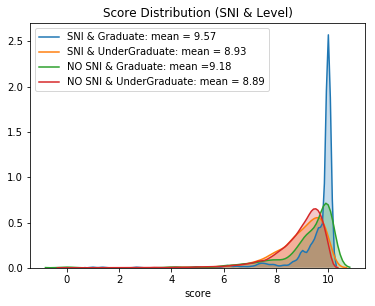

In [68]:
plt.figure(figsize=(6,4.5))
l1 = data[np.logical_and(data.sni_yn=='SNI',data.under_yn=='Graduate')].score.mean()
l2 = data[np.logical_and(data.sni_yn=='SNI',data.under_yn=='Undergraduate')].score.mean()
l3 = data[np.logical_and(data.sni_yn=='NO SNI',data.under_yn=='Graduate')].score.mean()
l4 = data[np.logical_and(data.sni_yn=='NO SNI',data.under_yn=='Undergraduate')].score.mean()

sns.kdeplot(data[np.logical_and(data.sni_yn=='SNI',data.under_yn=='Graduate')].score, label = 'SNI & Graduate: mean = '+  str(round(l1,2)), shade=True)
sns.kdeplot(data[np.logical_and(data.sni_yn=='SNI',data.under_yn=='Undergraduate')].score, label = 'SNI & UnderGraduate: mean = ' + str(round(l2,2)), shade=True)
sns.kdeplot(data[np.logical_and(data.sni_yn=='NO SNI',data.under_yn=='Graduate')].score, label = 'NO SNI & Graduate: mean =' + str(round(l3,2)), shade=True)
sns.kdeplot(data[np.logical_and(data.sni_yn=='NO SNI',data.under_yn=='Undergraduate')].score, label = 'NO SNI & UnderGraduate: mean = ' + str(round(l4,2)), shade=True)
plt.xlabel('score')
plt.title('Score Distribution (SNI & Level)')
plt.savefig('images/score_sni_level.png')

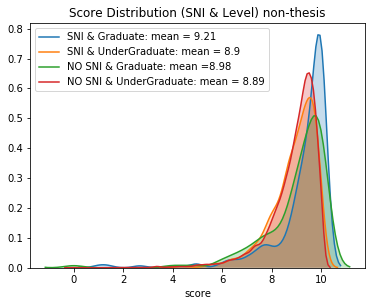

In [65]:
t = data[data.thesis==0]
plt.figure(figsize=(6,4.5))
l1 = t[np.logical_and(t.sni_yn=='SNI',t.under_yn=='Graduate')].score.mean()
l2 = t[np.logical_and(t.sni_yn=='SNI',t.under_yn=='Undergraduate')].score.mean()
l3 = t[np.logical_and(t.sni_yn=='NO SNI',t.under_yn=='Graduate')].score.mean()
l4 = t[np.logical_and(t.sni_yn=='NO SNI',t.under_yn=='Undergraduate')].score.mean()

sns.kdeplot(t[np.logical_and(t.sni_yn=='SNI',t.under_yn=='Graduate')].score, label = 'SNI & Graduate: mean = '+  str(round(l1,2)), shade=True)
sns.kdeplot(t[np.logical_and(t.sni_yn=='SNI',t.under_yn=='Undergraduate')].score, label = 'SNI & UnderGraduate: mean = ' + str(round(l2,2)), shade=True)
sns.kdeplot(t[np.logical_and(t.sni_yn=='NO SNI',t.under_yn=='Graduate')].score, label = 'NO SNI & Graduate: mean =' + str(round(l3,2)), shade=True)
sns.kdeplot(t[np.logical_and(t.sni_yn=='NO SNI',t.under_yn=='Undergraduate')].score, label = 'NO SNI & UnderGraduate: mean = ' + str(round(l4,2)), shade=True)
plt.xlabel('score')
plt.title('Score Distribution (SNI & Level) non-thesis')
plt.savefig('images/score_sni_level_2.png')

The analysis of variance (ANOVA) can be thought of as an extension to the t-test. The independent t-test is used to compare the means of a condition between 2 groups. ANOVA is used when one wants to compare the means of a condition between 2+ groups. 

In [329]:
print('SNI: ',
    stats.f_oneway(data['score'][data['sni_yn'] == 'SNI'].dropna(), 
             data['score'][data['sni_yn'] == 'NO SNI'].dropna()))

print('Level: ',
    stats.f_oneway(data['score'][data['under_yn'] == 'Undergraduate'].dropna(), 
             data['score'][data['under_yn'] == 'Graduate'].dropna())
)

print('SNI & Level: ',
    stats.f_oneway(data['score'][(data.sni_yn=='SNI') & (data.under_yn=='Graduate')].dropna(), 
             data['score'][(data.sni_yn=='SNI') & (data.under_yn=='Undergraduate')].dropna(),
              data['score'][(data.sni_yn=='NO SNI') & (data.under_yn=='Graduate')].dropna(),
              data['score'][(data.sni_yn=='NO SNI') & (data.under_yn=='Undergraduate')].dropna())
     )

SNI:  F_onewayResult(statistic=6.678489963596562, pvalue=0.009767572886415091)
Level:  F_onewayResult(statistic=20.233251623455118, pvalue=6.906556193876423e-06)
SNI & Level:  F_onewayResult(statistic=8.49776669000488, pvalue=1.229798485120851e-05)


In [355]:
print('SNI & Graduate',sum(((data.sni_yn=='SNI') & (data.under_yn=='Graduate'))*1))
print('SNI & Undergraduate',sum(((data.sni_yn=='SNI') & (data.under_yn=='Undergraduate'))*1))
print('NO SNI & Graduate',sum(((data.sni_yn=='NO SNI') & (data.under_yn=='Graduate'))*1))
print('NO SNI & Undergraduate',sum(((data.sni_yn=='NO SNI') & (data.under_yn=='Undergraduate'))*1))

SNI & Graduate 666
SNI & Undergraduate 859
NO SNI & Graduate 205
NO SNI & Undergraduate 13867


## 7. Conclusions <a id='conclusions'></a>

In [159]:
data  = data.drop(columns = ['rectoria'])

In [155]:
data = data.drop(columns = ['Crn','rectoria','level','campus','division','department','thesis','num_group','cat_lab',
                            'cat_escolar','cat_rh','nationality','age', 'antiguedad','school_national', 'school_giee',
                            'giee','giee_role', 'SNI','course_attributes','books', 'bseries', 'proceedings','journal_q1q2',
                            'journal_q3q4','books_norm','bseries_norm','proceedings_norm', 'journal_q1q2_norm', 'journal_q3q4_norm'])

In [160]:
data.columns

Index(['ID', 'gender', 'degree', 'pdhd', 'experience',
       'percentage_responsability', 'terminal_group', 'multicampus',
       'main_professor', 'seniors', 'opinions', 'participation', 'teach_hours',
       'lecture_hours', 'lab_hours', 'credits', '05num', '05avg', '05std',
       '06num', '06avg', '06std', '08num', '08avg', '08std', 'total',
       'total_norm', 'sni_yn', 'score', 'under_yn', 'counts_total',
       'counts_graduate', 'counts_undergraduate', 'counts_highschool',
       'mxn_yn'],
      dtype='object')

In [162]:
data_prep = data[['percentage_responsability','terminal_group','multicampus',
                  'main_professor','seniors','participation','teach_hours','lecture_hours', 'lab_hours',
                  'credits','total_norm', 'sni_yn', 'score','under_yn','counts_total','counts_graduate',
                  'counts_undergraduate', 'counts_highschool', 'mxn_yn']];
df_dum = pd.get_dummies(data_prep);

In [167]:
for i in df_dum:
    if sum((df_dum[i].isnull())*1)!=0:
        print(i,sum((df_dum[i].isnull())*1))

In [166]:
df_dum = df_dum.fillna({'score':df_dum.score.mean()}).dropna()

## Undergraduate

In [2109]:
data_prep = data[['pdhd','percentage_responsability','terminal_group','multicampus',
                  'main_professor','seniors','participation','teach_hours','lecture_hours', 'lab_hours',
                  'credits','total_norm', 'sni_yn', 'score','under_yn','counts_total','counts_graduate',
                  'counts_undergraduate', 'counts_highschool', 'mxn_yn']];
data_under = data_prep[data_prep.under_yn=='Undergraduate'].reset_index(drop=True)

In [2110]:
for i in data_under:
    if sum((data_under[i].isnull())*1)!=0:
        print(i,sum((data_under[i].isnull())*1))

seniors 1
participation 1
score 45


In [2111]:
data_under[data_under.score.isnull()].sni_yn.value_counts()

NO SNI    36
SNI        9
Name: sni_yn, dtype: int64

In [2112]:
#Replace the nan scores with the mean of snis or no snis
data_under[np.logical_and(data_under.score.isnull(),data_under.sni_yn == 'SNI')] = data_under[np.logical_and(data_under.score.isnull(),data_under.sni_yn == 'SNI')].fillna({'score':data_under[data_under.sni_yn=='SNI'].score.mean()})

data_under[np.logical_and(data_under.score.isnull(),data_under.sni_yn == 'NO SNI')] = data_under[np.logical_and(data_under.score.isnull(),data_under.sni_yn == 'NO SNI')].fillna({'score':data_under[data_under.sni_yn=='NO SNI'].score.mean()})
data_under = data_under.dropna()

In [2113]:
#No more nan in the variable score
data_grad[data_grad.score.isnull()].sni_yn.value_counts()

SNI       0
NO SNI    0
Name: sni_yn, dtype: int64

In [2114]:
#Imbalanced classes in the variables SNI
data_under.sni_yn.value_counts()

NO SNI    13866
SNI         859
Name: sni_yn, dtype: int64

In [2115]:
from sklearn.utils import resample

df_majority = data_under[data_under.sni_yn=='NO SNI']
df_minority = data_under[data_under.sni_yn=='SNI']

df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=13867,    # to match majority class
                                 random_state=123) # reproducible results
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

df_upsampled.sni_yn.value_counts()

SNI       13867
NO SNI    13866
Name: sni_yn, dtype: int64

In [2116]:
X = df_upsampled
cond1 = (X.score >= X.score.quantile(0.5)).replace([True,False],[1,0])
X['score_category'] = cond1 # Creates a binary variable

In [2117]:
print(X.score.quantile(0.5))
v = X['score_category'].value_counts()
print(v.values)
print('% Good',v[1]/sum(v))

9.166666666666666
[13947 13786]
% Good 0.5029026791187394


In [2118]:
# Because we filtered on Undergraduate and no SNI, we need to eliminate this variables

X_0 = X.drop(columns = ['under_yn','score','score_category'])
#under_yn ya no es necesario porque ya filtramos por undergraduate courses


X_0 = pd.get_dummies(X_0); # get dummy variable for sni_yn
X_0 = X_0.drop(columns=['sni_yn_SNI','main_professor_NO','mxn_yn_Mexican','terminal_group_NO','pdhd_No Certificado'])
y_0 = X.score_category 

from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_0, y_0, test_size=0.20) 

In [2119]:
# Ranks features, we selected 7 because is half of the features that he have
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(estimator = logreg, n_features_to_select=1)
rfe = rfe.fit(X_train, y_train);
print(rfe.support_)
print(rfe.ranking_)

C:\Users\luiss\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\luiss\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\luiss\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\luiss\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\luiss\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

[False False False  True False False False False False False False False
 False False False False False False]
[ 5 18 17  1  6 15 14 13 12  9 10 11  2  8  7  3 16  4]


C:\Users\luiss\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\luiss\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\luiss\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\luiss\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\luiss\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [2120]:
lista = np.ndarray.tolist(rfe.ranking_)
columnas = X_train.columns
nueva_lista = []
for i in range(1,len(lista)+1):
    nueva_lista.append(columnas[lista.index(i)])
nueva_lista    

['participation',
 'counts_highschool',
 'main_professor_SI',
 'mxn_yn_Foreign',
 'percentage_responsability',
 'teach_hours',
 'terminal_group_SI',
 'pdhd_Certificado',
 'counts_total',
 'counts_graduate',
 'counts_undergraduate',
 'total_norm',
 'credits',
 'lab_hours',
 'lecture_hours',
 'sni_yn_NO SNI',
 'seniors',
 'multicampus']

In [2124]:
for i in X_0:
    X_0[i] = X_0[i].astype('float64')
y_0 = y_0.astype('float64')

In [2125]:
X = X_0
y = y_0

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#percentage and seniors = .78
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\luiss\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [2126]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.56


In [2129]:
X = X_0[nueva_lista[0:15]]#,'sni_yn_NO SNI']]
y = y_0
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.686503
         Iterations 4
                                   Results: Logit
Model:                      Logit                  Pseudo R-squared:       0.010     
Dependent Variable:         score_category         AIC:                    38105.5581
Date:                       2019-05-07 19:07       BIC:                    38220.7833
No. Observations:           27733                  Log-Likelihood:         -19039.   
Df Model:                   13                     LL-Null:                -19223.   
Df Residuals:               27719                  LLR p-value:            1.5227e-70
Converged:                  1.0000                 Scale:                  1.0000    
No. Iterations:             4.0000                                                   
-------------------------------------------------------------------------------------
                           Coef.    Std.Err.     z    P>|z|     [0.025    

### Attempt 2
Because results are bad we are going to group data by professor

In [2130]:
df_temp = data[['ID', 'degree', 'pdhd',
                  'percentage_responsability', 
                  'multicampus', 'seniors',  'total',
                  'total_norm', 'sni_yn', 'score', 'under_yn',
                  'counts_total', 'counts_graduate', 'counts_undergraduate',
                  'counts_highschool', 'mxn_yn', '05num']].copy()
df_temp = df_temp[df_temp.under_yn=='Undergraduate']

In [2131]:
for i in df_temp:
    if sum((df_temp[i].isnull())*1)!=0:
        print(i,sum((df_temp[i].isnull())*1))

degree 31
seniors 1
score 45
05num 2


In [2132]:
#Replace the nan scores with the mean of snis or no snis
df_temp[np.logical_and(df_temp.score.isnull(),df_temp.sni_yn == 'SNI')] = df_temp[np.logical_and(df_temp.score.isnull(),df_temp.sni_yn == 'SNI')].fillna({'score':df_temp[df_temp.sni_yn=='SNI'].score.mean()})

df_temp[np.logical_and(df_temp.score.isnull(),df_temp.sni_yn == 'NO SNI')] = df_temp[np.logical_and(df_temp.score.isnull(),df_temp.sni_yn == 'NO SNI')].fillna({'score':df_temp[df_temp.sni_yn=='NO SNI'].score.mean()})
df_temp = df_temp.dropna()

In [2133]:
# Separates variables on professor characteristics and class characteristics
prof_var = ['ID', 'degree', 'pdhd', 'total', 'total_norm', 'sni_yn', 'counts_total',
            'counts_graduate', 'counts_undergraduate', 'counts_highschool', 'mxn_yn'];
class_var = [ 'percentage_responsability', 'multicampus', 'seniors', 'score', 'under_yn', 'score_category', '05num']


In [2134]:
# Selects the professor variables and eliminates duplicates
df_professor = df_temp[prof_var].sort_values(by=['ID']).drop_duplicates(subset = 'ID', keep='first').reset_index(drop=True)

In [2135]:
# Create a df of Weighted arithmetic mean of the score by professor
id_list = df_professor.ID.unique()
weighted_score = []
for i in id_list:
    score_professor = df_temp[df_temp.ID == i]['score'].values  
    students_professor = df_temp[df_temp.ID == i]['05num'].values
    weighted_score.append(sum(score_professor * students_professor)/sum(students_professor))

C:\Users\luiss\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


In [2136]:
# Adds the weighted score variable to the professor dataset
df_professor['weighted_score'] = weighted_score

In [2137]:
# Creates dummy variables
df_professor_dum = pd.get_dummies(df_professor)

In [2138]:
df_professor_dum = df_professor_dum.drop(columns = ['ID','sni_yn_SNI','mxn_yn_Mexican','pdhd_No Certificado','degree_Profesional'])
#Drops extra dummy variables

In [2139]:
# Creates the categorical variable 
cond1 = (df_professor_dum.weighted_score >= df_professor_dum.weighted_score.quantile(0.5)).replace([True,False],[1,0])
df_professor_dum['score_category'] = cond1 # Creates a binary variable

In [2140]:
df_professor_dum['sni_yn_NO SNI'].value_counts()

1    5850
0     352
Name: sni_yn_NO SNI, dtype: int64

In [2141]:
from sklearn.utils import resample

df_majority = df_professor_dum[df_professor_dum['sni_yn_NO SNI']==1]
df_minority = df_professor_dum[df_professor_dum['sni_yn_NO SNI']==0]

df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=5850,    # to match majority class
                                 random_state=123) # reproducible results
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

df_upsampled['sni_yn_NO SNI'].value_counts()

1    5850
0    5850
Name: sni_yn_NO SNI, dtype: int64

In [2142]:
df_professor_dum.columns

Index(['total', 'total_norm', 'counts_total', 'counts_graduate',
       'counts_undergraduate', 'counts_highschool', 'weighted_score',
       'degree_Doctorado', 'degree_Maestría', 'pdhd_Certificado',
       'sni_yn_NO SNI', 'mxn_yn_Foreign', 'score_category'],
      dtype='object')

In [2143]:
X_0 = df_professor_dum.drop(columns=['score_category','weighted_score']);
y_0 = df_professor_dum.loc[:, df_professor_dum.columns == 'score_category']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_0, y_0, test_size=0.2)

In [2144]:
# Ranks features, we selected 7 because is half of the features that he have
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(estimator = logreg, n_features_to_select=1)
rfe = rfe.fit(X_train, y_train);
print(rfe.support_)
print(rfe.ranking_)

[False False False False False  True False False False False False]
[ 9  8  7  6  5  1  2  3  4 10 11]


C:\Users\luiss\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\luiss\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\luiss\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\luiss\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\luiss\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will b

In [2145]:
lista = np.ndarray.tolist(rfe.ranking_)
columnas = X_train.columns
nueva_lista = []
for i in range(1,len(lista)+1):
    nueva_lista.append(columnas[lista.index(i)])
nueva_lista    

['counts_highschool',
 'degree_Doctorado',
 'degree_Maestría',
 'pdhd_Certificado',
 'counts_undergraduate',
 'counts_graduate',
 'counts_total',
 'total_norm',
 'total',
 'sni_yn_NO SNI',
 'mxn_yn_Foreign']

In [2146]:
for i in X_0:
    X_0[i] = X_0[i].astype('float64')
y_0 = y_0.astype('float64')

In [2156]:
X = X_0
y = y_0

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X[['degree_Doctorado',
                                                       #'pdhd_Certificado',
                                                       'counts_undergraduate',
                                                       'counts_graduate',
                                                       #'counts_total'
                                                      ]], y, test_size=0.2,random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.52


C:\Users\luiss\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\luiss\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [2157]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.52


In [2161]:
X = X_0[nueva_lista].drop(columns=['sni_yn_NO SNI'])#,'mxn_yn_Foreign','total','total_norm','degree_Maestría','sni_yn_NO SNI'])#,'sni_yn_NO SNI']]
y = y_0
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.690097
         Iterations 5
                                  Results: Logit
Model:                    Logit                  Pseudo R-squared:       0.004     
Dependent Variable:       score_category         AIC:                    8577.9684 
Date:                     2019-05-07 19:10       BIC:                    8638.5621 
No. Observations:         6202                   Log-Likelihood:         -4280.0   
Df Model:                 8                      LL-Null:                -4298.9   
Df Residuals:             6193                   LLR p-value:            8.0955e-06
Converged:                1.0000                 Scale:                  1.0000    
No. Iterations:           5.0000                                                   
-----------------------------------------------------------------------------------
                      Coef.    Std.Err.      z    P>|z|      [0.025       0.975]   
---------

In [ ]:
'degree_Doctorado','pdhd_Certificado','counts_undergraduate','counts_graduate','counts_total'

### Attempt 3 (no balance classes)

In [1969]:
data_prep = data[['pdhd','percentage_responsability','terminal_group','multicampus',
                  'main_professor','seniors','participation','teach_hours','lecture_hours', 'lab_hours',
                  'credits','total_norm', 'sni_yn', 'score','under_yn','counts_total','counts_graduate',
                  'counts_undergraduate', 'counts_highschool', 'mxn_yn']];
data_under = data_prep[data_prep.under_yn=='Undergraduate'].reset_index(drop=True)

In [1973]:
for i in data_under:
    if sum((data_under[i].isnull())*1)!=0:
        print(i,sum((data_under[i].isnull())*1))

seniors 1
participation 1


In [1971]:
data_under[data_under.score.isnull()].sni_yn.value_counts()

NO SNI    36
SNI        9
Name: sni_yn, dtype: int64

In [1974]:
#Replace the nan scores with the mean of snis or no snis
data_under[np.logical_and(data_under.score.isnull(),data_under.sni_yn == 'SNI')] = data_under[np.logical_and(data_under.score.isnull(),data_under.sni_yn == 'SNI')].fillna({'score':data_under[data_under.sni_yn=='SNI'].score.mean()})

data_under[np.logical_and(data_under.score.isnull(),data_under.sni_yn == 'NO SNI')] = data_under[np.logical_and(data_under.score.isnull(),data_under.sni_yn == 'NO SNI')].fillna({'score':data_under[data_under.sni_yn=='NO SNI'].score.mean()})
data_under = data_under.dropna()

In [1976]:
#No more nan in the variable score
data_grad[data_grad.score.isnull()].sni_yn.value_counts()

SNI       0
NO SNI    0
Name: sni_yn, dtype: int64

In [1978]:
X = data_under
cond1 = (X.score >= X.score.quantile(0.5)).replace([True,False],[1,0])
X['score_category'] = cond1 # Creates a binary variable

In [1979]:
print(X.score.quantile(0.5))
v = X['score_category'].value_counts()
print(v.values)
print('% Good',v[1]/sum(v))

9.166666666666666
[7375 7350]
% Good 0.5008488964346349


In [1980]:
# Because we filtered on Undergraduate and no SNI, we need to eliminate this variables

X_0 = X.drop(columns = ['under_yn','score','score_category'])
#under_yn ya no es necesario porque ya filtramos por undergraduate courses


X_0 = pd.get_dummies(X_0); # get dummy variable for sni_yn
X_0 = X_0.drop(columns=['sni_yn_SNI','main_professor_NO','mxn_yn_Mexican','terminal_group_NO','pdhd_No Certificado'])
y_0 = X.score_category 

from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_0, y_0, test_size=0.20) 

In [1981]:
# Ranks features, we selected 7 because is half of the features that he have
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(estimator = logreg, n_features_to_select=1)
rfe = rfe.fit(X_train, y_train);
print(rfe.support_)
print(rfe.ranking_)

C:\Users\luiss\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\luiss\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\luiss\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\luiss\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\luiss\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

[False False False  True False False False False False False False False
 False False False False False False]
[ 5 15 14  1  4 13 17  7 18 10 16 11  2 12  8  6  9  3]


C:\Users\luiss\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\luiss\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\luiss\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\luiss\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\luiss\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [1982]:
lista = np.ndarray.tolist(rfe.ranking_)
columnas = X_train.columns
nueva_lista = []
for i in range(1,len(lista)+1):
    nueva_lista.append(columnas[lista.index(i)])
nueva_lista    

['participation',
 'counts_highschool',
 'mxn_yn_Foreign',
 'teach_hours',
 'percentage_responsability',
 'main_professor_SI',
 'credits',
 'terminal_group_SI',
 'sni_yn_NO SNI',
 'counts_total',
 'counts_undergraduate',
 'pdhd_Certificado',
 'lecture_hours',
 'seniors',
 'multicampus',
 'counts_graduate',
 'lab_hours',
 'total_norm']

In [1983]:
for i in X_0:
    X_0[i] = X_0[i].astype('float64')
y_0 = y_0.astype('float64')

In [2043]:
X = X_0
y = y_0

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#percentage and seniors = .78
X_train, X_test, y_train, y_test = train_test_split(X[[#'participation',
                                                      #'counts_highschool',
                                                      'teach_hours',
                                                      'credits',
                                                      'terminal_group_SI',
                                                      'seniors']], y, test_size=0.2)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\luiss\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [2044]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.56


In [2045]:
X = X_0[nueva_lista[0:15]]#,'sni_yn_NO SNI']]
y = y_0
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.683465
         Iterations 4
                              Results: Logit
Model:                 Logit               Pseudo R-squared:    0.014     
Dependent Variable:    score_category      AIC:                 20158.0543
Date:                  2019-05-07 16:12    BIC:                 20272.0138
No. Observations:      14725               Log-Likelihood:      -10064.   
Df Model:              14                  LL-Null:             -10207.   
Df Residuals:          14710               LLR p-value:         1.5097e-52
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        4.0000                                             
--------------------------------------------------------------------------
                           Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------
participation              0

## Graduate

In [2069]:
data_prep = data[['percentage_responsability','terminal_group','multicampus',
                  'main_professor','seniors','participation','teach_hours','lecture_hours', 'lab_hours',
                  'credits','total_norm', 'sni_yn', 'score','under_yn','counts_total','counts_graduate',
                  'counts_undergraduate', 'counts_highschool', 'mxn_yn']];
data_grad = data_prep[data_prep.under_yn=='Graduate'].reset_index(drop=True)

In [2070]:
for i in data_grad:
    if sum((data_grad[i].isnull())*1)!=0:
        print(i,sum((data_grad[i].isnull())*1))

score 28


In [2071]:
data_grad[data_grad.score.isnull()].sni_yn.value_counts()

SNI       21
NO SNI     7
Name: sni_yn, dtype: int64

In [2072]:
#Replace the nan scores with the mean of snis or no snis
data_grad[np.logical_and(data_grad.score.isnull(),data_grad.sni_yn == 'SNI')] = data_grad[np.logical_and(data_grad.score.isnull(),data_grad.sni_yn == 'SNI')].fillna({'score':data_grad[data_grad.sni_yn=='SNI'].score.mean()})

data_grad[np.logical_and(data_grad.score.isnull(),data_grad.sni_yn == 'NO SNI')] = data_grad[np.logical_and(data_grad.score.isnull(),data_grad.sni_yn == 'NO SNI')].fillna({'score':data_grad[data_grad.sni_yn=='NO SNI'].score.mean()})


In [2073]:
#No more nan in the variable score
data_grad[data_grad.score.isnull()].sni_yn.value_counts()

SNI       0
NO SNI    0
Name: sni_yn, dtype: int64

In [2074]:
#Imbalanced classes in the variables SNI
data_grad.sni_yn.value_counts()

SNI       666
NO SNI    205
Name: sni_yn, dtype: int64

In [2075]:
from sklearn.utils import resample

df_majority = data_grad[data_grad.sni_yn=='SNI']
df_minority = data_grad[data_grad.sni_yn=='NO SNI']

df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=666,    # to match majority class
                                 random_state=123) # reproducible results
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

df_upsampled.sni_yn.value_counts()

SNI       666
NO SNI    666
Name: sni_yn, dtype: int64

In [2076]:
X = df_upsampled
cond1 = (X.score >= X.score.quantile(0.5)).replace([True,False],[1,0])
X['score_category'] = cond1 # Creates a binary variable

In [2077]:
print(X.score.quantile(0.5))
v = X['score_category'].value_counts()
print(v.values)
print('% Good',v[1]/sum(v))

9.833333333333334
[672 660]
% Good 0.5045045045045045


In [2078]:
# Because we filtered on Undergraduate and no SNI, we need to eliminate this variables

X_0 = X.drop(columns = ['under_yn','score','score_category','terminal_group','counts_highschool'])
#terminal_group is always 0 in graduate courses  
#counts_highschool is always 0

X_0 = pd.get_dummies(X_0); # get dummy variable for sni_yn
X_0 = X_0.drop(columns=['sni_yn_NO SNI','main_professor_NO','mxn_yn_Mexican'])
y_0 = X.score_category 

from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_0, y_0, test_size=0.2) #

In [2079]:
X_train.columns

Index(['percentage_responsability', 'multicampus', 'seniors', 'participation',
       'teach_hours', 'lecture_hours', 'lab_hours', 'credits', 'total_norm',
       'counts_total', 'counts_graduate', 'counts_undergraduate',
       'main_professor_SI', 'sni_yn_SNI', 'mxn_yn_Foreign'],
      dtype='object')

In [2080]:
# Ranks features, we selected 7 because is half of the features that he have
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(estimator = logreg, n_features_to_select=1)
rfe = rfe.fit(X_train, y_train);
print(rfe.support_)
print(rfe.ranking_)

[ True False False False False False False False False False False False
 False False False]
[ 1  3  4 10 15  5 12  6  9 14 11  8 13  2  7]


C:\Users\luiss\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\luiss\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\luiss\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\luiss\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\luiss\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [2081]:
lista = np.ndarray.tolist(rfe.ranking_)
columnas = X_train.columns
nueva_lista = []
for i in range(1,len(lista)+1):
    nueva_lista.append(columnas[lista.index(i)])
nueva_lista    

['percentage_responsability',
 'sni_yn_SNI',
 'multicampus',
 'seniors',
 'lecture_hours',
 'credits',
 'mxn_yn_Foreign',
 'counts_undergraduate',
 'total_norm',
 'participation',
 'counts_graduate',
 'lab_hours',
 'main_professor_SI',
 'counts_total',
 'teach_hours']

In [2082]:
for i in X_0:
    X_0[i] = X_0[i].astype('float64')
y_0 = y_0.astype('float64')

In [2093]:
X = X_0
y = y_0

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#percentage and seniors = .78
X_train, X_test, y_train, y_test = train_test_split(X[['percentage_responsability',
                                                       #'sni_yn_SNI',
                                                       #'multicampus',
                                                       'seniors',
                                                       #'total_norm',
                                                       #'counts_undergraduate',
                                                       #'counts_graduate'
                                                      ]], y, test_size=0.2)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\luiss\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [2094]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.81


In [2099]:
X = X_0[nueva_lista[0:15]]#,'sni_yn_NO SNI']]
y = y_0
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.458330
         Iterations: 35
                                    Results: Logit
Model:                     Logit                   Pseudo R-squared:        0.339      
Dependent Variable:        score_category          AIC:                     1248.9921  
Date:                      2019-05-07 18:38        BIC:                     1321.7142  
No. Observations:          1332                    Log-Likelihood:          -610.50    
Df Model:                  13                      LL-Null:                 -923.22    
Df Residuals:              1318                    LLR p-value:             2.8735e-125
Converged:                 0.0000                  Scale:                   1.0000     
No. Iterations:            35.0000                                                     
---------------------------------------------------------------------------------------
                           Coef.     Std.Err.     z     P>|z|     [0.025       0.975]  
---

C:\Users\luiss\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [2096]:
#https://stackoverflow.com/questions/40264763/how-can-i-make-my-confusion-matrix-plot-only-1-decimal-in-python
import itertools
import numpy as np

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Oranges):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_professor_dum.score_category.unique()))
    plt.xticks(tick_marks, rotation=45)
    ax = plt.gca()
    ax.set_xticklabels((ax.get_xticks() +1).astype(str))
    plt.yticks(tick_marks)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 92  40]
 [ 12 123]]


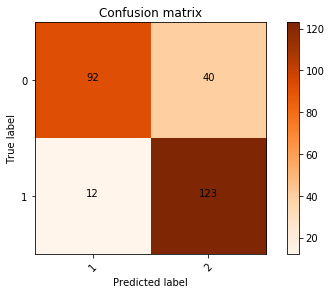

In [2097]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
cm = confusion_matrix
np.set_printoptions(precision=1) #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
print('Confusion matrix, without normalization')
print(cm)
fig, ax = plt.subplots()
plot_confusion_matrix(cm)
plt.show()

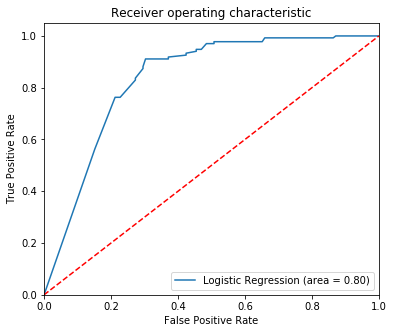

In [2098]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

tree_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % tree_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

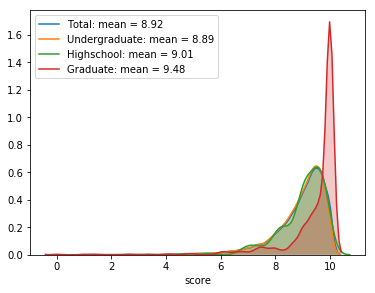

In [66]:
plt.figure(figsize=(6,4.5))
#distribution_plot(data,'under_yn')
l1 = data.score.mean()
l2 = data[data.under_yn=='Undergraduate'].score.mean()
l3 = data[data.under_yn=='Highschool'].score.mean()
l4 = data[data.under_yn=='Graduate'].score.mean()

sns.kdeplot(data.score, label = 'Total: mean = '+  str(round(l1,2)), shade=True)
sns.kdeplot(data[data.under_yn=='Undergraduate'].score, label = 'Undergraduate: mean = '+  str(round(l2,2)), shade=True)
sns.kdeplot(data[data.under_yn=='Highschool'].score, label = 'Highschool: mean = '+  str(round(l3,2)), shade=True)
sns.kdeplot(data[data.under_yn=='Graduate'].score, label = 'Graduate: mean = '+  str(round(l4,2)), shade=True)

plt.xlabel('score')
plt.savefig('images/score_level.png')

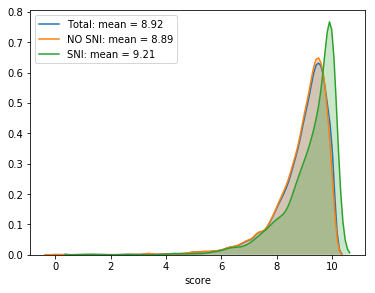

In [67]:
plt.figure(figsize=(6,4.5))
l1 = data.score.mean()
l2 = data[data.sni_yn=='NO SNI'].score.mean()
l3 = data[data.sni_yn=='SNI'].score.mean()

sns.kdeplot(data.score, label = 'Total: mean = '+  str(round(l1,2)), shade=True)
sns.kdeplot(data[data.sni_yn == 'NO SNI'].score, label = 'NO SNI: mean = '+  str(round(l2,2)), shade=True)
sns.kdeplot(data[data.sni_yn=='SNI'].score, label = 'SNI: mean = '+  str(round(l3,2)), shade=True)
plt.xlabel('score')
plt.savefig('images/score_sni.png')

# Preguntas
- Qué es bueno? quartiles?
- Error en %Participación, >100% y por lo tanto tambien está mal Alumnos que Opinaron
- Semestres de Experiencia tiene un máximo de 114 
- Mejor variable de experiencia? Semestres de experiencia, edad al semestre, años de antiguedad

To do:
- Hacer el experimento de clasificación únicamente con la variable sni_yn.
- Hacer ANOVA con la variable sni_yn y score.
- Balancear las clases en sni_yn.
- Disminuir a 20% el test set.
- Hacer un ANOVA con la última gráfica.
- Hacer una regresión múltilple con el score como output para ver los coeficientes del modelo.

grupo terminal puede ser 0 o 1 en undergraduate, pero siempre es 0 en Master, PhD Y Highschool

In [2047]:
r = pd.read_excel('201713_ECOAS_Anonimizado.xlsx')

In [2051]:
sum(r[i].isnull()*1)

14010

In [2065]:
len(r[r['Nacionalidad']!='Mexicana'])/len(r)

0.05798111653253913

In [2058]:
r.columns

Index(['Ejercicio', 'Crn', 'ID_Prof', 'Rectoría del Campus', 'Campus',
       'División', 'Departamento', 'Tesis en título', 'Número de Grupo',
       'Grupo Virtual', 'Crn UV', 'Categoría Laboral', 'Puesto (Escolar)',
       'Puesto (RH)', 'Nacionalidad', 'Género', 'Edad al semestre',
       'Años de Antigüedad', 'Grado Máximo Prof',
       'Estatus PDHD (Habilidades Docentes)', 'Semestres Experiencia',
       'Escuela Nacional Disciplina', 'Escuela GIEE', 'Giee',
       'Participación en GIEE', 'Nivel SNI 2019',
       'Porcentaje responsabilidad prof. grupo', 'Nivel materia',
       'Indicador grupo terminal', 'Atributos grupo', '# Multicampus',
       'Profesor Titular', 'Alumnos Candidatos', 'Alumnos que Opinaron',
       'Participación (%)', 'Horas Equivalentes Frente al Grupo',
       'Horas clase', 'Horas laboratorio', 'Unidades Equivalentes', '05 #Op',
       '05 Prom', '05 Desv', '06 #Op', '06 Prom', '06 Desv', '08 #Op',
       '08 Prom', '08 Desv', 'Book', 'Book Series', 'Co